In [63]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline
plt.style.use('ggplot')

In [5]:
#Importing dataset
DATA_PATH = './data/'
dataset = pd.read_csv(DATA_PATH + 'train.csv')
dataset = dataset.drop(['id', 'qid1', 'qid2'], axis = 1)
dataset = dataset.fillna('empty')

In [6]:
dataset.head()

,question1,question2,is_duplicate
0,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [9]:
# Some examples of duplicate questions

duplicate_questions = dataset[dataset['is_duplicate'] == 1]
duplicate_questions.head()

,question1,question2,is_duplicate
5,Astrology: I am a Capricorn Sun Cap moon and c...,"I'm a triple Capricorn (Sun, Moon and ascendan...",1
7,How can I be a good geologist?,What should I do to be a great geologist?,1
11,How do I read and find my YouTube comments?,How can I see all my Youtube comments?,1
12,What can make Physics easy to learn?,How can you make physics easy to learn?,1
13,What was your first sexual experience like?,What was your first sexual experience?,1


In [11]:
duplicate_questions.describe()

,is_duplicate
count,149263.0
mean,1.0
std,0.0
min,1.0
25%,1.0
50%,1.0
75%,1.0
max,1.0


In [10]:
# Som examples of valid questions

valid_questions = dataset[dataset['is_duplicate'] == 0]
valid_questions.head()

,question1,question2,is_duplicate
0,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [12]:
valid_questions.describe()

,is_duplicate
count,255027.0
mean,0.0
std,0.0
min,0.0
25%,0.0
50%,0.0
75%,0.0
max,0.0


In [210]:
# Cleaning the texts and making dataset

import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
question1 = []
question2 = []
ps = PorterStemmer()
tf_vect = TfidfVectorizer(min_df=1)
stop_words = set(stopwords.words('english'))
dq1 = dataset['question1']
dq2 = dataset['question2']
X_tfid = []
X_len_diff = []
y = []
sw = [] 
for i in range(0, dataset.shape[0]):
    q1 = re.sub('[^a-zA-Z]', ' ', dq1[i])
    q1 = q1.lower()
    q1 = q1.split()   
    q1 = [ps.stem(word) for word in q1 if not word in stop_words]
    q1 = ' '.join(q1)
    question1.append(q1)
    q2 = re.sub('[^a-zA-Z]', ' ', dq2[i])
    q2 = q2.lower()
    q2 = q2.split()
    q2 = [ps.stem(word) for word in q2 if not word in stop_words]
    q2 = ' '.join(q2)
    question2.append(q2)
    try:
        array = [q1, q2]
        tfidf = tf_vect.fit_transform(array)
        similarity_array = (tfidf * tfidf.T).A
        X_tfid.append(similarity_array[0][1])
    except:
        X_tfid.append(0)
    y.append(dataset.is_duplicate[row])
    len_diff = len(q1)- len(q2)
    X_len_diff.append(len_diff)
    sw.append(Score(q1, q2))
    if i% 1000 == 0:
        print(f'{i} entries completed')

0 entries completed
1000 entries completed
2000 entries completed
3000 entries completed
4000 entries completed
5000 entries completed
6000 entries completed
7000 entries completed
8000 entries completed
9000 entries completed
10000 entries completed
11000 entries completed
12000 entries completed
13000 entries completed
14000 entries completed
15000 entries completed
16000 entries completed
17000 entries completed
18000 entries completed
19000 entries completed
20000 entries completed
21000 entries completed
22000 entries completed
23000 entries completed
24000 entries completed
25000 entries completed
26000 entries completed
27000 entries completed
28000 entries completed
29000 entries completed
30000 entries completed
31000 entries completed
32000 entries completed
33000 entries completed
34000 entries completed
35000 entries completed
36000 entries completed
37000 entries completed
38000 entries completed
39000 entries completed
40000 entries completed
41000 entries completed
42000

333000 entries completed
334000 entries completed
335000 entries completed
336000 entries completed
337000 entries completed
338000 entries completed
339000 entries completed
340000 entries completed
341000 entries completed
342000 entries completed
343000 entries completed
344000 entries completed
345000 entries completed
346000 entries completed
347000 entries completed
348000 entries completed
349000 entries completed
350000 entries completed
351000 entries completed
352000 entries completed
353000 entries completed
354000 entries completed
355000 entries completed
356000 entries completed
357000 entries completed
358000 entries completed
359000 entries completed
360000 entries completed
361000 entries completed
362000 entries completed
363000 entries completed
364000 entries completed
365000 entries completed
366000 entries completed
367000 entries completed
368000 entries completed
369000 entries completed
370000 entries completed
371000 entries completed
372000 entries completed


In [165]:
#Count of similar words
def Score(guess, solution):
    guess = guess.split()
    solution = solution.split()
    c = 0
    for g in guess:
        if g in solution:
            c += 1.0
    return c

In [217]:
# Creating inputs and outputs
X_sw = np.asarray(sw).reshape(len(sw),1)
X_tfid = np.asarray(X_tfid).reshape(len(X_tfid),1)
X_len_diff= np.asarray(X_len_diff).reshape(len(X_len_diff),1)
y= dataset['is_duplicate'].values.reshape(len(dataset['is_duplicate']),1)
X = np.hstack((X_tfid, X_sw, X_len_diff))
data = np.hstack((X, y))
df_data = pd.DataFrame(data, columns=['Similarity', 'Similar Words', 'Difference between length', 'is_duplicate'])

In [317]:
# New Dataset

df_data.head()

,Similarity,Similar Words,Difference between length,is_duplicate
0,0.895532,6.0,6.0,0.0
1,0.410995,4.0,-32.0,0.0
2,0.380873,3.0,8.0,0.0
3,0.000000,0.0,-12.0,0.0
4,0.168368,2.0,29.0,0.0


In [218]:
df_data.describe()

,Similarity,Similar Words,Difference between length,is_duplicate
count,404290.000000,404290.000000,404290.000000,404290.000000
mean,0.472586,2.835536,-0.072878,0.369198
std,0.283160,1.780136,18.599271,0.482588
min,0.000000,0.000000,-512.000000,0.000000
25%,0.260556,2.000000,-7.000000,0.000000
50%,0.450176,3.000000,0.000000,0.000000
75%,0.709297,4.000000,7.000000,1.000000
max,1.000000,26.000000,251.000000,1.000000


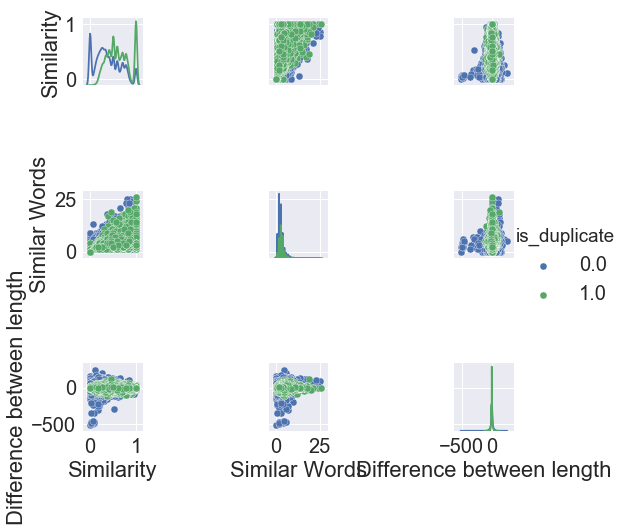

In [318]:
import seaborn as sns
scatter_plot = sns.pairplot(
    data=df_data,
    hue='is_duplicate',
    vars=['Similarity', 'Similar Words', 'Difference between length'],
    diag_kind='kde')

In [221]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# X = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [296]:
import xgboost as xgb

# Set our parameters for xgboost
params = {}
params['objective'] = 'binary:logistic'
params['eval_metric'] = 'logloss'
params['eta'] = 0.02
params['max_depth'] = 4

X_train_new = scaler.fit_transform(X_train)
X_test_new = scaler.transform(X_test)
y_train_new = y_pred_df['TRUE']
d_train = xgb.DMatrix(X_train_new, label=y_train_new)
d_valid = xgb.DMatrix(X_test_new, label=y_test)

watchlist = [(d_train, 'train'),(d_valid, 'valid')]

bst = xgb.train(params, d_train, 1000000, watchlist, early_stopping_rounds=50, verbose_eval=10)

[0]	train-logloss:0.688537	valid-logloss:0.68854
Multiple eval metrics have been passed: 'valid-logloss' will be used for early stopping.

Will train until valid-logloss hasn't improved in 50 rounds.
[10]	train-logloss:0.65094	valid-logloss:0.650989
[20]	train-logloss:0.624547	valid-logloss:0.624608
[30]	train-logloss:0.605289	valid-logloss:0.605333
[40]	train-logloss:0.591118	valid-logloss:0.59117
[50]	train-logloss:0.580318	valid-logloss:0.580358
[60]	train-logloss:0.572114	valid-logloss:0.572141
[70]	train-logloss:0.565771	valid-logloss:0.565813
[80]	train-logloss:0.560879	valid-logloss:0.560913
[90]	train-logloss:0.556986	valid-logloss:0.557015
[100]	train-logloss:0.553919	valid-logloss:0.553932
[110]	train-logloss:0.551497	valid-logloss:0.551498
[120]	train-logloss:0.549575	valid-logloss:0.549583
[130]	train-logloss:0.548145	valid-logloss:0.548157
[140]	train-logloss:0.546992	valid-logloss:0.547023
[150]	train-logloss:0.546029	valid-logloss:0.546091
[160]	train-logloss:0.545303	va

[1550]	train-logloss:0.529711	valid-logloss:0.531432
[1560]	train-logloss:0.529656	valid-logloss:0.531387
[1570]	train-logloss:0.529618	valid-logloss:0.531362
[1580]	train-logloss:0.529565	valid-logloss:0.531318
[1590]	train-logloss:0.529547	valid-logloss:0.531309
[1600]	train-logloss:0.529507	valid-logloss:0.531278
[1610]	train-logloss:0.529473	valid-logloss:0.531254
[1620]	train-logloss:0.529436	valid-logloss:0.531228
[1630]	train-logloss:0.529407	valid-logloss:0.531212
[1640]	train-logloss:0.529369	valid-logloss:0.53118
[1650]	train-logloss:0.529343	valid-logloss:0.531164
[1660]	train-logloss:0.529318	valid-logloss:0.531149
[1670]	train-logloss:0.529277	valid-logloss:0.53112
[1680]	train-logloss:0.529241	valid-logloss:0.53109
[1690]	train-logloss:0.529215	valid-logloss:0.531074
[1700]	train-logloss:0.529184	valid-logloss:0.531062
[1710]	train-logloss:0.529149	valid-logloss:0.531035
[1720]	train-logloss:0.529104	valid-logloss:0.531004
[1730]	train-logloss:0.529072	valid-logloss:0.530

[3110]	train-logloss:0.525918	valid-logloss:0.529404
[3120]	train-logloss:0.525901	valid-logloss:0.529397
[3130]	train-logloss:0.525886	valid-logloss:0.529394
[3140]	train-logloss:0.525864	valid-logloss:0.529386
[3150]	train-logloss:0.525853	valid-logloss:0.529384
[3160]	train-logloss:0.525836	valid-logloss:0.529371
[3170]	train-logloss:0.52582	valid-logloss:0.529363
[3180]	train-logloss:0.525806	valid-logloss:0.529358
[3190]	train-logloss:0.525787	valid-logloss:0.529353
[3200]	train-logloss:0.525771	valid-logloss:0.529346
[3210]	train-logloss:0.525756	valid-logloss:0.52934
[3220]	train-logloss:0.525739	valid-logloss:0.529333
[3230]	train-logloss:0.525726	valid-logloss:0.52933
[3240]	train-logloss:0.525713	valid-logloss:0.529325
[3250]	train-logloss:0.5257	valid-logloss:0.529322
[3260]	train-logloss:0.525682	valid-logloss:0.529318
[3270]	train-logloss:0.525667	valid-logloss:0.529314
[3280]	train-logloss:0.525658	valid-logloss:0.529312
[3290]	train-logloss:0.525643	valid-logloss:0.52930

In [320]:
d_test = xgb.DMatrix(X_train_new)
y_pred_xgb = bst.predict(d_test)
# cm_vc = confusion_matrix(y_train, y_pred_xgb)

In [321]:
from sklearn.metrics import log_loss
log_loss(y_train, y_pred_xgb)

0.5244334656647593

In [322]:
from sklearn.ensemble import GradientBoostingClassifier as GBC
gbc = GBC()
gbc.fit(y_pred_xgb.reshape((-1,1)), y_train)

D:\Programs\Anaconda3\envs\NLPMarshall\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [323]:
# Predictions

y_pred_gbc = gbc.predict(y_pred_xgb.reshape((-1,1)))

In [324]:
from sklearn.metrics import confusion_matrix, roc_curve, auc
cm = confusion_matrix(y_train, y_pred_gbc)

Text(15,0.5,'True Value')

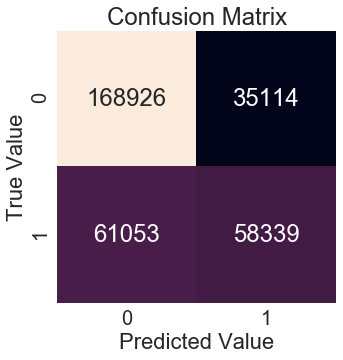

In [325]:
plt.figure(figsize=(5, 5))
plt.title(f'Confusion Matrix')
sns.set(font_scale=2)
sns.heatmap(cm, annot=True, fmt='g', cbar=False)
plt.xlabel('Predicted Value')
plt.ylabel('True Value')

In [326]:
d_test = xgb.DMatrix(X_test_new)
y_pred_xgb = bst.predict(d_test)
y_pred_gbc = gbc.predict(y_pred_xgb.reshape((-1,1)))
cm = confusion_matrix(y_test, y_pred_gbc)

Text(15,0.5,'True Value')

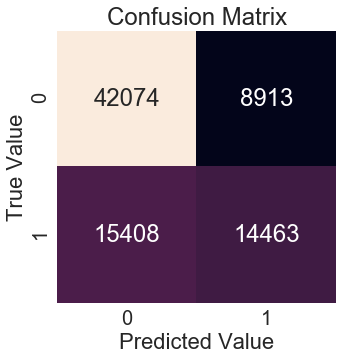

In [327]:
plt.figure(figsize=(5, 5))
plt.title(f'Confusion Matrix')
sns.set(font_scale=2)
sns.heatmap(cm, annot=True, fmt='g', cbar=False)
plt.xlabel('Predicted Value')
plt.ylabel('True Value')

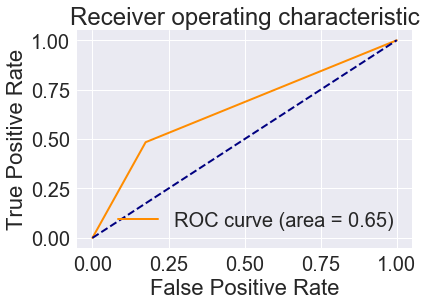

In [328]:
# Plot ROC Curve and calculate AUC

fpr, tpr, _ = roc_curve(y_test, y_pred_gbc)
roc_auc = auc(fpr, tpr)



plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()